In [2]:
from main import plot
from test import hn_example as hn

ModuleNotFoundError: ModuleNotFoundError: No module named 'main'

# Proceso

Esta documentación desarrolla el ejemplo de prueba `./test/hn_example.py` como artefacto mínimo viable de investigación.

In [10]:
hn_gis = hn.Gis()

hn_gis.parent_dir = './test'

# Análisis Geográfico

Este proceso consiste en un análisis del SIG estándar. Se definen las constantes, se carga el archivo shapefile y se le da formato correspondiente agregando demás columnas. Se identifica como variable independiente a la columna departamento.

Luego se desarrolla el MAS Estratificado y se establece el reporte de los datos obtenidos.

## Recopilación de Datos

Este problema es una exageración que permite de momento llevar a cabo el proceso propuesto de muestreo virtual. La mayor parte de datos creados en este problema no tienen relación con la realidad pero si sirven como modelo para ser aplicado a un caso con datos reales.

Los datos del muestreo físico son recolectados mediante la desnormalización de la base de datos del usuario. Esto implica que en análisis de datos se ven muchos fenómenos como redundancia, etc. El cultivo de azúcares se da por zafra, en este caso, se asume una zafra 2021 la cual da todos los registros de ese año.

Las 4 [variedades](https://www.gob.mx/conadesuca/es/articulos/variedades-de-cana-de-azucar?idiom=es) tomadas son una referencia importante que se encontrará de forma mucho más diversa en una base de datos real. Estas son variedades significativas, en un caso real se tiene una gran cantidad de variedades de azúcares por lo que el analista deberá tomar solo aquellas significativas para reducir la carga de la muestra. Otras variedades de azúcares significativas incluye, a saber, `CP 73-1547`, `RB 86-7515`, etc. Las encuestas pueden ser herramientas adecuadas para la obtención de esta información por parte de los interesados.

Por tanto, se debe de tomar una variable adecuada física o biológica como la variedad del cultivo para crear cada estrato con unidades de muestreo homogéneas. Al definir inicialmente los estratos, se tendrá una lista muy grande de opciones por lo que será necesario tomar un subconjunto significativo de estos estratos filtrando aquellos que no son significativos de acuerdo al criterio establecido por el analista. Después de este filtrado, se obtienen los estratos definitivos y el mapa original queda con áreas no representativas por lo que se define el estrato vacio `Ninguno`. Originalmente puede que ya existan áreas no representativas como zonas de construcción, contaminadas, etc.

## Filtrado

El filtrado inicial se ha definido como sigue:

- Remover estratos vacíos.
- Remover estratos con variedades insignificantes.

Para determinar las variedades insignificantes se establece una cota mínima (umbral) de área cosechada por variedad, estos datos vienen del muestreo físico. Por tanto, la condición para determinar si una variedad es significante es si pertenece a las cuatro variedades definidas arriba o si el área cosechada para esa variedad supera un umbral determinado. En este problema solo se filtrará tomando las cuatro variedades comúnes.

# Muestreo Físico

Este `DataFrame` contiene los supuestos datos de zafra 2021 en el suelo agrícola. Es decir, todos los registros de variedades tomados en ese año. Además, en un conjunto de datos original existen muchas otras variables que pueden ser usadas para otros cálculos. Este `DataFrame` solo contiene el filtrado con las columnas correspondientes para el análisis de rendimiento.

In [11]:
# Definición del muestreo virtual

STRATA_SIZE = 4
STRATUM_SAMPLING_FACTOR = 0.25
STRATUM_SAMPLING_SIZE = (hn.HardSampling.POPULATION_SIZE / STRATA_SIZE) * STRATUM_SAMPLING_FACTOR

# Resumen de Muestro

En las siguientes dos tablas se listan los datos del SIG y del muestreo físico filtrado para análisis de rendimiento correspondientemente.

## Modelo de Muestreo

### Muestro Físico

El tamaño de la población `N = 100_000` unidades de muestreo.

Unidad de área: Hectárea.

### Muestreo Virtual

#### Estratos

Se han definido cuatro estratos significativos correspondientes a variedades de azúcares. Por tanto, `H = { H_1, ... , H_4 }`.

Tamaño de muestreo por estrato (`H_n`) = `t_h * factor` donde `factor` en `[0,1]` representa el porcentaje de unidades aleatorias a tomar en cada estrata `H` respecto a `t_h`.

Con respecto al conjuntos de datos geográficos originalmente cargado, este simplemente cuenta con una (generosa) columna `geography` la cual contiene la información vectorial del mapa del suelo agrícola. También fue útil la columna `DEPARTMENT_COL` conteniendo la partición hecha por el usuario. En este caso, los estratos son por variedad significante por lo que el problema debe ser tal que los subconjuntos de la partición del mapa ("departamentos") contienen únicamente una variedad. Esto se detalla más en la sección de visualización abajo. A partir de estos criterios, el analista deberá poder obtener la información geográfica útil del usuario.

In [12]:
# SIG

hn_df = hn_gis.df()

hn_df

,NAME_1,Estrato,Área Departamento (HA)
0,Atlántida,CP 72-2086,422700
1,Choluteca,Ninguno,439700
2,Colón,Mex 79-431,887500
3,Comayagua,ITV 92-1424,512000
4,Copán,Mex 79-431,323900
5,Cortés,CP 72-2086,391100
6,El Paraíso,CP 72-2086,738300
7,Francisco Morazán,Mex 69-290,861900
8,Gracias a Dios,ITV 92-1424,1587600
9,Intibucá,Ninguno,312600


In [13]:
# Muestreo físico

psampling = hn.HardSampling.generate()

psampling

,Estrato,Área Cosechada (HA),TA/HA Real
0,Ninguno,1930.6,3.0
1,ITV 92-1424,3800.3,4.1
2,ITV 92-1424,2506.3,0.4
3,Mex 69-290,208.7,5.3
4,CP 72-2086,4321.8,6.2
...,...,...,...
99995,ITV 92-1424,4627.7,0.3
99996,Mex 79-431,849.5,5.2
99997,CP 72-2086,1365.3,7.3
99998,Mex 69-290,4340.6,4.6


# Visualización de Muestro

En los siguientes bloques se visualizan los datos obtenidos arriba.

Por ejemplo, en los "departamentos" Cortés, 

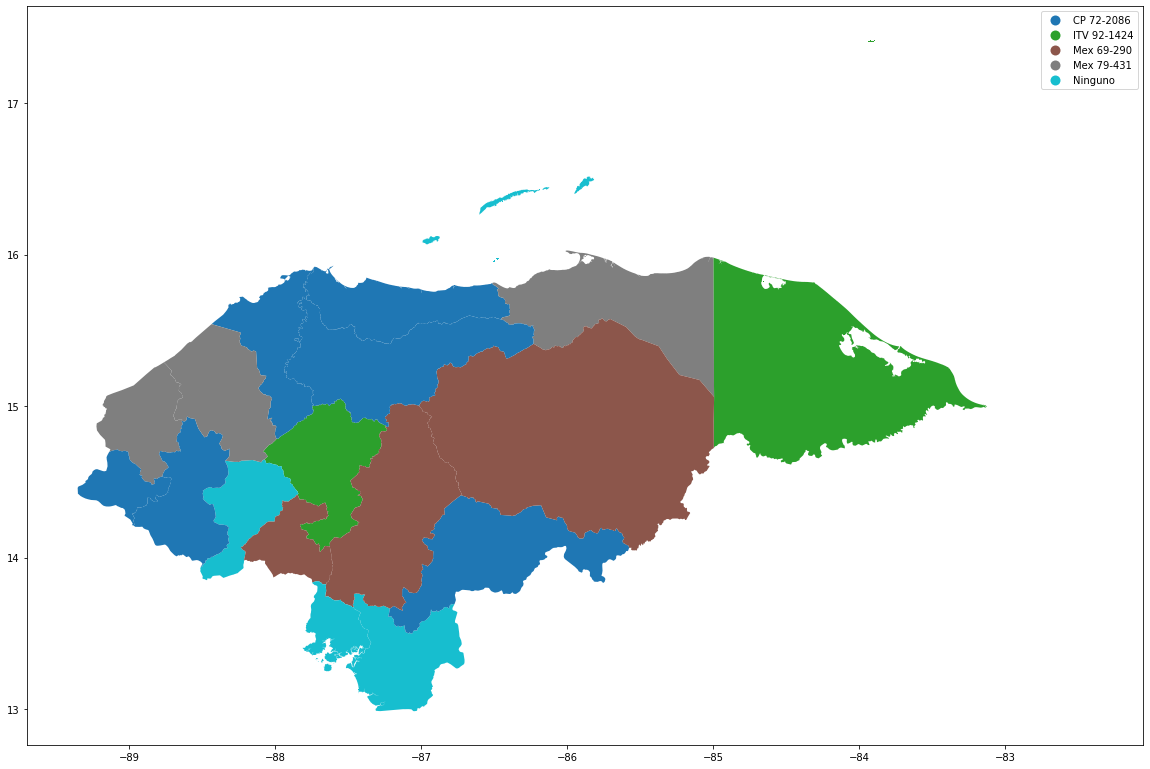

In [14]:
# SIG

hn_gdf = hn_gis.load()

plot(hn_gdf, 'Mapa de Suelo Agrícola por Lotes', size=20)

# Mapa de Suelo Agrícola por Estratos
hn_gdf.plot(figsize=(20, 20), column=hn.STRATUM_COL, legend=True)